In [1]:
from __future__ import division
from __future__ import print_function
import pandas as pd
import sys 
from collections import OrderedDict
sys.path.insert(0, "../codes/")
from IOutils import loadCellData

import matplotlib.pyplot as plt
import matplotlib as mpl
import  matplotlib.patches as mpatches
mpl.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.labelsize"] = "x-large"
plt.rcParams["xtick.labelsize"] =  "x-large"
plt.rcParams["ytick.labelsize"] =  "x-large"
plt.rcParams["legend.fontsize"] = "x-large"
plt.rcParams["axes.titlesize"] = "x-large"
%matplotlib inline

In [2]:
def scatterWithColor(plotDF , x , y , c , cVal_cTuple = None, cmap =None , showLeg = False, ax = None,
                    figsize = (7.5,3 ), xlabel = "", ylabel = "", kws_scatter = {"s" : 4 , "alpha" : 0.5},
                    leg_kwargs = {}):
    """
    plotDF - dataFrame with x , y ,c as columns
    cVal_cTuple - None or function mapping values to color tuples
    cmap - matplotlib cmap (for conintuous color mapping)
    """
    if ax is None:
        fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = figsize)
    if showLeg and (cVal_cTuple is not None):
        colorLabels = sorted( plotDF.loc[: , c].unique() )
        patchList = []
        for label in colorLabels:
            patchList.append(mpatches.Patch(color = cVal_cTuple(label), label = label ) ) 
    if  cVal_cTuple is not None:
        ax.scatter(plotDF.loc[: , x].values ,  plotDF.loc[: , y].values, c = plotDF.loc[: , c].map(cVal_cTuple).values, **kws_scatter )
        if showLeg:
            ax.legend(handles = patchList , **leg_kwargs )
    else:
        sc = ax.scatter(plotDF.loc[: , x].values ,  plotDF.loc[: , y].values, c = plotDF.loc[: , c].values, cmap = cmap  , **kws_scatter )
        plt.sca(ax)
        plt.colorbar(sc)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    return ax

In [3]:
pcDF = loadCellData( fnameDict = OrderedDict(
             [ ("pcComps" ,  "./kasp.ka10.k30_impute.t10_gene.geq5UMIgeq100Cell.all.csv" )])  )

loading Files
	loading file ./kasp.ka10.k30_impute.t10_gene.geq5UMIgeq100Cell.all.csv
Summary of Join:
	pcComps : 22338 of 22338 in join


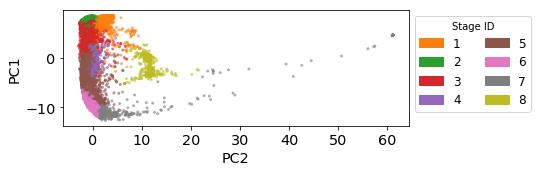

In [4]:
plotDF = pcDF["rowData"].copy()
plotDF["PC1"] = -1*plotDF.loc[: , "PC1"]
ax = scatterWithColor(plotDF=  plotDF.copy() , x = "PC2" , y = "PC1" , c = "clust_ID" , cVal_cTuple =plt.cm.tab10, cmap = None, showLeg = True , ax = None,
                    figsize = (7.5,2.5 ), xlabel = "PC2", ylabel = "PC1", kws_scatter = {"s" : 4 , "alpha" : 0.5},
                    leg_kwargs  = {"bbox_to_anchor":  (1.0, 1.0), "title" : "Stage ID", "fontsize" : 12, "ncol": 2})
#ax.set_xlim(-5,30)
fig = ax.get_figure()
fig.tight_layout(rect= (0,0,0.79 , 1))

fig.savefig("kasp.ka10.k30_impute.t10_gene.geq5UMIgeq100Cell.all.png", 
           bbox_to_inches = "tight" , format = "png")